<a href="https://colab.research.google.com/github/Keren-Neeq/DS4A-Team1/blob/main/notebooks/Team1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Remote Work Is Transforming America's Geographical Landscape
Team #1 | Ashek Ag Mohamed, Caprina Beal, Nzinga Eduardo Rodriguez, Keren Osabutey, Erika Smith

## Business Problem
### Overview

One of the most significant impacts of the Covid-19 pandemic may be a shift in how the workplace and workforce operate in the future. According to Forbes, approximately 5% of white-collar employees in the U.S. worked primarily from home before the outbreak. This figure skyrocketed to 71% during the pandemic. If given a choice to continue working from home post-pandemic, 54% of these workers indicated they would continue to do so, according to Pew Research Center. These figures will likely vary across occupations, industries, income, and education levels. As remote work becomes more popular, white-collar workers are likely to relocate from city centers to suburban areas, accelerating and changing geographic trends.

A report by the Economic Innovation Group (EIG) indicated that more than two-thirds of large urban counties saw their populations decline. Marking the first time in 50 years, counties with a population over 250,000  experienced negative growth. Although migration patterns had been in effect before Covid-19, the explosion of remote work during the pandemic, reductions in births, rising deaths, and delayed immigration accelerated the shift. EIG indicated other contributing factors, including high median home and apartment rental prices, low housing inventory, and increasing costs of consumer goods such as gas. 

Using data curated from Glassdoor, Zillow, the U.S. Department of Housing, the U.S. Bureau of Labor Statistics, and the U.S. Census Bureau, our analysis will answer the following:


1.   What are the top 10 cities in the U.S. with the most remote work opportunities?
2.   What are the top 10 states with the most remote work opportunities?
3.   Which jobs are likely to experience more significant increases in remote work?
4.   Which workers are most likely to have the option to work from home?
5.   How have city growth rates changed, and how is the population shifting?
6.   How have the average annual expenditures and population characteristics changed?
7.   How have the average home, and rent prices changed over time?
8.   What are the real estate implications of an increase in remote work?
9.   Is there a correlation between inflation, home prices, and rent prices?
10.   Has the inflation rate affected housing inventory? 
11. How has the cost of consumer goods changed?
12. What changes have occurred over time for consumer spending? 


## Import Libraries and Data

In [6]:
import os
import re
import io
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html

from google.colab import files
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

sys.path.insert(0, "../utils")
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

In [8]:
sns.set(context='talk',style = 'whitegrid')

In [9]:
uploaded = files.upload()

Saving clean_hud.csv to clean_hud (1).csv


In [10]:
# Department of Housing Avg. Rent Prices
hud_df = pd.read_csv(io.BytesIO(uploaded['clean_hud.csv']))

In [ ]:
# Zillow homes inventory
df_iv = pd.read_csv(io.BytesIO(uploaded['Metro_invt_fs_uc_sfrcondo_month.csv']))

In [ ]:
# Zillow homes sale price
df_sp = pd.read_csv(io.BytesIO(uploaded['Metro_median_sale_price_uc_sfrcondo_month.csv']))

In [ ]:
remote_df = pd.read_csv(io.BytesIO(uploaded['remote_jobs_US.csv']))

## Pre-Processing

### HUD Dataset

In [11]:
# View summary statistics of HUD dataset 
hud_df.describe()

,fips,fmr23_0,fmr23_1,fmr23_2,fmr23_3,fmr23_4,fmr22_0,fmr22_1,fmr22_2,fmr22_3,...,fmr20_4,fmr19_0,fmr19_1,fmr19_2,fmr19_3,fmr19_4,pop2010,pop2017,pop2000,census_region
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,2.488411e+09,1591.700000,1741.400000,2066.300000,2659.300000,3013.900000,1433.700000,1583.000000,1892.300000,2468.600000,...,2693.400000,1162.200000,1323.300000,1615.500000,2155.000000,2442.700000,2.684008e+06,2.815548e+06,2.521400e+06,3.000000
std,1.978748e+09,401.519351,479.107318,576.998565,676.257191,671.921201,431.407013,517.172011,630.384724,786.083287,...,894.696746,366.115282,434.194542,540.640823,692.011239,694.410069,2.918340e+06,2.982543e+06,2.871369e+06,1.247219
min,4.014000e+08,1158.000000,1245.000000,1406.000000,1758.000000,2172.000000,1005.000000,1091.000000,1253.000000,1587.000000,...,1822.000000,744.000000,868.000000,1073.000000,1455.000000,1738.000000,6.175940e+05,6.691600e+05,5.698910e+05,1.000000
25%,6.070000e+08,1259.000000,1389.500000,1654.500000,2162.500000,2491.000000,1082.250000,1177.750000,1367.750000,1835.500000,...,1969.000000,868.500000,987.000000,1214.000000,1596.750000,1907.750000,8.599928e+05,9.423450e+05,7.856198e+05,2.250000
50%,2.102853e+09,1439.000000,1607.000000,1977.500000,2692.000000,3038.500000,1246.000000,1420.000000,1793.500000,2442.500000,...,2505.500000,1044.500000,1235.000000,1553.000000,2044.000000,2309.000000,1.502330e+06,1.574638e+06,1.380347e+06,3.500000
75%,4.429400e+09,1976.000000,2097.750000,2393.750000,3046.750000,3413.500000,1770.750000,1924.250000,2266.000000,2913.000000,...,3062.500000,1410.500000,1560.000000,1882.000000,2396.500000,2623.500000,3.345650e+06,3.646155e+06,2.738370e+06,4.000000
max,5.303400e+09,2156.000000,2665.000000,3188.000000,3912.000000,4283.000000,2115.000000,2631.000000,3198.000000,4111.000000,...,4657.000000,1822.000000,2255.000000,2809.000000,3663.000000,3912.000000,9.818605e+06,1.010572e+07,9.519338e+06,4.000000


As the heatmap below shows there is:

1.   A strong positive correlation between the apartment types, i.e. fmr23_0, fmr23_4.
2.   A slight negative correlation between the apartment types and the populations, i.e. fmr23_0 and pop2000.
3.  No correlation between fips and population.


In [39]:
# Heatmap of correlations across features
fig = px.imshow(hud_df.corr())

fig.update_layout(
    title_text='HUD Dataset Feature Correlations', 
    title_x=0.5, 
    width=800, 
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
    )

fig.show()

In [16]:
# View information about the data including non-null counts
hud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fips           10 non-null     int64 
 1   state          10 non-null     object
 2   area_name      10 non-null     object
 3   county_name    10 non-null     object
 4   fmr23_0        10 non-null     int64 
 5   fmr23_1        10 non-null     int64 
 6   fmr23_2        10 non-null     int64 
 7   fmr23_3        10 non-null     int64 
 8   fmr23_4        10 non-null     int64 
 9   fmr22_0        10 non-null     int64 
 10  fmr22_1        10 non-null     int64 
 11  fmr22_2        10 non-null     int64 
 12  fmr22_3        10 non-null     int64 
 13  fmr22_4        10 non-null     int64 
 14  fmr21_0        10 non-null     int64 
 15  fmr21_1        10 non-null     int64 
 16  fmr21_2        10 non-null     int64 
 17  fmr21_3        10 non-null     int64 
 18  fmr21_4        10 non-null     in

In [13]:
# Summary of the number of nulls values
hud_df.isna().sum()

fips             0
state            0
area_name        0
county_name      0
fmr23_0          0
fmr23_1          0
fmr23_2          0
fmr23_3          0
fmr23_4          0
fmr22_0          0
fmr22_1          0
fmr22_2          0
fmr22_3          0
fmr22_4          0
fmr21_0          0
fmr21_1          0
fmr21_2          0
fmr21_3          0
fmr21_4          0
fmr20_0          0
fmr20_1          0
fmr20_2          0
fmr20_3          0
fmr20_4          0
fmr19_0          0
fmr19_1          0
fmr19_2          0
fmr19_3          0
fmr19_4          0
pop2010          0
pop2017          0
pop2000          0
census_region    0
dtype: int64

From the matrix plot below, the solid gray bars indicate that there are no missing values across all features. The line on the right indicates where the missing values are distributed, the line would would move towards the left in areas with missing values, the fact that the line is solid also confirms that there are no missing values. 

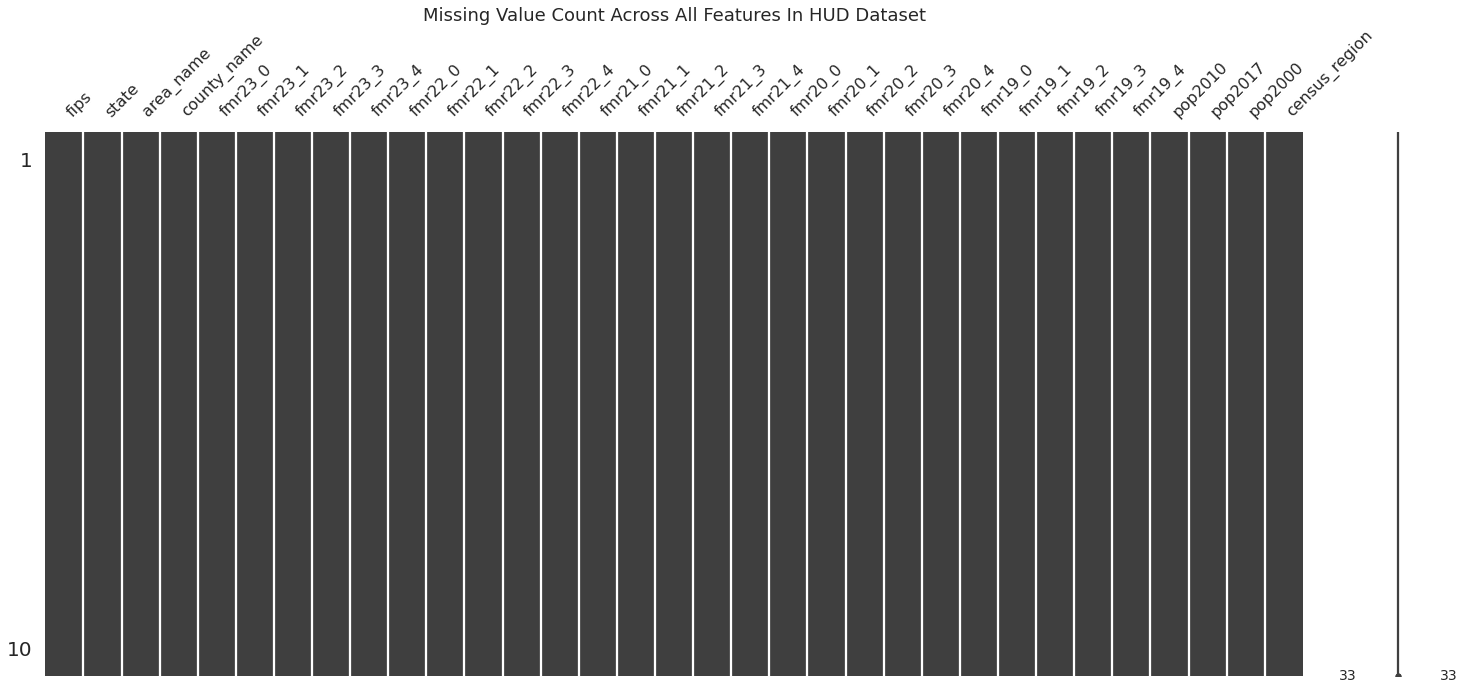

In [17]:
# Gives a matrix plot of the missing values
msno.matrix(hud_df)
plt.title('Missing Value Count Across All Features In HUD Dataset')
plt.show()

In [ ]:
# Removing county_name, census_region, population for 2000, 2010, & 2017
hud_df = hud_df.drop(['fips','county_name', 'pop2000','pop2010','pop2017','census_region'], axis=1)

In [ ]:
hud_df.rename(columns = {'fmr23_0': 'studio_22', 'fmr23_1':'1bdrm_22',
       'fmr23_2':'2bdrm_22', 'fmr23_3':'3bdrm_22', 'fmr23_4':'4bdrm_22', 'fmr22_0':'studio_21',
       'fmr22_1':'1bdrm_21', 'fmr22_2':'2bdrm_21', 'fmr22_3':'3bdrm_21', 'fmr22_4':'4bdrm_21', 
       'fmr21_0':'studio_20', 'fmr21_1':'1bdrm_20', 'fmr21_2':'2bdrm_20', 'fmr21_3':'3bdrm_20',
       'fmr21_4':'4bdrm_20', 'fmr20_0':'studio_19', 'fmr20_1':'1bdrm_19', 'fmr20_2':'2bdrm_19', 
       'fmr20_3':'3bdrm_19', 'fmr20_4':'4bdrm_19','fmr19_0':'studio_18','fmr19_1':'1bdrm_18',
       'fmr19_2':'2bdrm_18', 'fmr19_3':'3bdrm_18', 'fmr19_4':'4bdrm_18'}, inplace=True)


Reorder the columns from 2018 to 2022 to get the correct calculation for % change. Original file has the columns ordered from 2022 to 2018.

In [ ]:
hud_df = hud_df[['state', 'area_name','studio_18','studio_19','studio_20','studio_21','studio_22','1bdrm_18','1bdrm_19',
      '1bdrm_20','1bdrm_21','1bdrm_22','2bdrm_18','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22','3bdrm_18','3bdrm_19',
      '3bdrm_20','3bdrm_21','3bdrm_22','4bdrm_18','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22']]

In [ ]:
hud_df = hud_df.set_index(['area_name', 'state'])

#### Calculate annual apartment rent price change in dollars and as a percentage

In [ ]:
percentdf = hud_df.pct_change(axis="columns") 
pricedf = hud_df.diff(axis = 1)

In [ ]:
# Drop unnecessary columns, i.e. columns containing data from 2019
pricedf = pricedf.drop(['4bdrm_18','3bdrm_18', '2bdrm_18', '1bdrm_18','studio_18'], axis = 1)
percentdf = percentdf.drop(['4bdrm_18','3bdrm_18', '2bdrm_18', '1bdrm_18','studio_18'], axis = 1)

In [ ]:
percentdf.reset_index(inplace = True)
pricedf.reset_index(inplace = True)

In [ ]:
# Reshape data
percentdf = pd.melt(percentdf.reset_index(), id_vars =['area_name', 'state'], var_name = 'apartment_type', value_vars=['studio_19','studio_20','studio_21','studio_22','1bdrm_19',
      '1bdrm_20','1bdrm_21','1bdrm_22','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22','3bdrm_19',
      '3bdrm_20','3bdrm_21','3bdrm_22','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22'], value_name = 'percent_chg')

pricedf = pd.melt(pricedf.reset_index(), id_vars =['area_name', 'state'], var_name = 'apartment_type', value_vars=['studio_19','studio_20','studio_21','studio_22','1bdrm_19',
      '1bdrm_20','1bdrm_21','1bdrm_22','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22','3bdrm_19',
      '3bdrm_20','3bdrm_21','3bdrm_22','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22'], value_name = 'amount_diff')

In [ ]:
# Combine percentdf and pricedf

merged_df = pd.merge(pricedf, percentdf, on = ['area_name', 'state', 'apartment_type'])

In [ ]:
merged_df

,area_name,state,apartment_type,amount_diff,percent_chg
0,Phoenix,AZ,studio_19,103,0.138441
1,Los_Angeles,CA,studio_19,121,0.104491
2,Sacramento,CA,studio_19,99,0.116061
3,San_Francisco,CA,studio_19,375,0.205818
4,Chicago,IL,studio_19,41,0.044809
...,...,...,...,...,...
195,Boston,MA,4bdrm_22,287,0.088226
196,New_York,NY,4bdrm_22,143,0.045068
197,Nashville,TN,4bdrm_22,198,0.100253
198,Austin,TX,4bdrm_22,222,0.101185


In [ ]:
merged_df.rename(columns = {'area_name': 'City', 'state':'State', 'amount_diff':'Price Difference', 'percent_chg':'Percent Difference'}, inplace=True)


In [ ]:
# Extract number of bedrooms and year from apartment_type column
merged_df[['Bedroom','Year']] = merged_df['apartment_type'].str.split('_', expand=True)

In [ ]:
# Replace year with annual range
yeardict = {'19': '2018-2019', '20':'2019-2020', '21':'2020-2021', '22':'2021-2022'}

merged_df['Year'] = merged_df['Year'].map(yeardict)
merged_df

,City,State,apartment_type,Price Difference,Percent Difference,Bedroom,Year
0,Phoenix,AZ,studio_19,103,0.138441,studio,2018-2019
1,Los_Angeles,CA,studio_19,121,0.104491,studio,2018-2019
2,Sacramento,CA,studio_19,99,0.116061,studio,2018-2019
3,San_Francisco,CA,studio_19,375,0.205818,studio,2018-2019
4,Chicago,IL,studio_19,41,0.044809,studio,2018-2019
...,...,...,...,...,...,...,...
195,Boston,MA,4bdrm_22,287,0.088226,4bdrm,2021-2022
196,New_York,NY,4bdrm_22,143,0.045068,4bdrm,2021-2022
197,Nashville,TN,4bdrm_22,198,0.100253,4bdrm,2021-2022
198,Austin,TX,4bdrm_22,222,0.101185,4bdrm,2021-2022


In [ ]:
merged_df.drop(columns = 'apartment_type', inplace=True)

In [ ]:
merged_df['City'] = merged_df['City'].str.replace("_"," ")
merged_df['Bedroom'] = merged_df['Bedroom'].str.split('bdrm', expand = True)[0]

In [ ]:
merged_df

,City,State,Price Difference,Percent Difference,Bedroom,Year
0,Phoenix,AZ,103,0.138441,studio,2018-2019
1,Los Angeles,CA,121,0.104491,studio,2018-2019
2,Sacramento,CA,99,0.116061,studio,2018-2019
3,San Francisco,CA,375,0.205818,studio,2018-2019
4,Chicago,IL,41,0.044809,studio,2018-2019
...,...,...,...,...,...,...
195,Boston,MA,287,0.088226,4,2021-2022
196,New York,NY,143,0.045068,4,2021-2022
197,Nashville,TN,198,0.100253,4,2021-2022
198,Austin,TX,222,0.101185,4,2021-2022


### Remote Jobs Dataset

In [ ]:
remote_df.sample(5, random_state=1)

,company_name,job_title,job_senority,degree,job_desc,city,state,salary_range,avg_salary,salary_lower,salary_upper,size,industry,sector,job_function,revenue,num_listings
304,Advisor Group,Communications Manager,NaN,NaN,corporate communications opportunity in financ...,New York,NY,62000 - 89000,74571.0,62000,89000,1001 - 5000,Investment & Asset Management,Financial Services,Media & Communications,NaN,258
965,Blue Cross Blue Shield of Arizona,Senior Data Analyst,NaN,NaN,"awarded the best place to work 2021, blue cros...",Phoenix,AZ,65000 - 91000,76782.0,65000,91000,1001 - 5000,Insurance Carriers,Insurance,Research & Science,NaN,791
726,Path Mental Health,Licensed Clinical Social Worker,NaN,NaN,about path\npath is a national behavioral heal...,Chico,CA,3000 - 9000,5625.0,3000,9000,1001 - 5000,Health Care Services & Hospitals,Healthcare,Healthcare,NaN,571
931,McAfee,"Senior Legal Counsel, Products and Brand",NaN,NaN,"job title:\nsenior legal counsel, products and...",San Jose,CA,-111 - -111,NaN,-111,-111,1001 - 5000,Computer Hardware Development,Information Technology,Legal,NaN,160
1102,La Frontera Arizona,SEABHS - Clinical Operations Support Staff,NaN,NaN,summary\nemployee will screen all clientele fo...,Benson,AZ,-111 - -111,NaN,-111,-111,1001 - 5000,Healthcare,NaN,Operations,NaN,610


In [ ]:
remote_df.shape

(1118, 17)

In [ ]:
remote_df.dtypes

company_name     object
job_title        object
job_senority    float64
degree           object
job_desc         object
city             object
state            object
salary_range     object
avg_salary      float64
salary_lower      int64
salary_upper      int64
size             object
industry         object
sector           object
job_function     object
revenue          object
num_listings      int64
dtype: object

In [ ]:
# Confirm the number of missing values in each column.
remote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1109 non-null   object 
 1   job_title     1115 non-null   object 
 2   job_senority  0 non-null      float64
 3   degree        69 non-null     object 
 4   job_desc      1118 non-null   object 
 5   city          977 non-null    object 
 6   state         1118 non-null   object 
 7   salary_range  1118 non-null   object 
 8   avg_salary    935 non-null    float64
 9   salary_lower  1118 non-null   int64  
 10  salary_upper  1118 non-null   int64  
 11  size          1116 non-null   object 
 12  industry      1113 non-null   object 
 13  sector        1023 non-null   object 
 14  job_function  1118 non-null   object 
 15  revenue       69 non-null     object 
 16  num_listings  1118 non-null   int64  
dtypes: float64(2), int64(3), object(12)
memory usage: 148.6+ KB


We plot a heatmap of the missing values give us insight as to how missing values across different features correlate. Nin

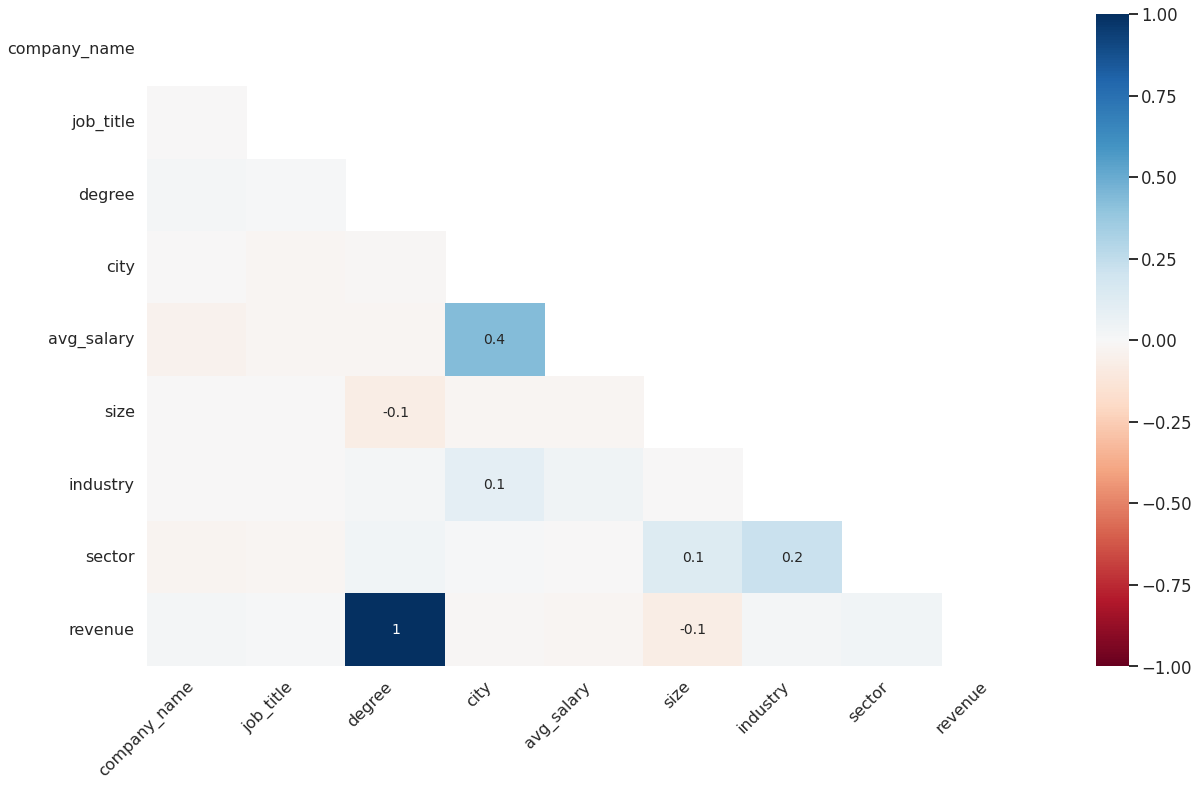

In [ ]:
# Gives a heatmap of how missing values are related
msno.heatmap(remote_df)
plt.show()

In [ ]:
remote_df.describe()

,job_senority,avg_salary,salary_lower,salary_upper,num_listings
count,0.0,935.000000,1118.000000,1118.000000,1118.000000
mean,NaN,69928.110374,40170.216458,34444.397138,581.642218
std,NaN,38524.105641,28141.258864,35739.879796,519.994808
min,NaN,2700.000000,-111.000000,-111.000000,28.000000
25%,NaN,45476.500000,10450.000000,-111.000000,196.000000
50%,NaN,61465.000000,42557.000000,35360.000000,454.000000
75%,NaN,85353.500000,58810.000000,67000.000000,791.000000
max,NaN,500000.000000,208000.000000,149760.000000,2595.000000


As the below boxplot charts indicate, the median salary is approximately $61K, the median lower range is $42K, and the median upper range is $35K, which indicates that there are likely missing or incorrect values

In [ ]:
# Plot box plot of avg_salary
fig = px.box(remote_df, y='avg_salary')
fig.show()

In [ ]:
# Plot box plot of salary_lower
fig = px.box(remote_df, y='salary_lower')
fig.show()

In [ ]:
# Plot box plot of salary_upper
fig = px.box(remote_df, y='salary_upper')
fig.show()

### Homes Sale

In [ ]:
target_cities = ['New York, NY', 'Chicago, IL', 'Boston, MA', 'Seattle, WA', 'San Francisco, CA', 'Sacramento, CA', 'Austin, TX', 'Los Angeles, CA', 'Nashville, TN', 'Phoenix, AZ']

In [ ]:
sale_price = df_sp[df_sp.RegionName.isin(target_cities)]

In [ ]:
sale_price = sale_price[['RegionName','2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', 
    '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
           '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', 
    '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
            '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', 
    '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'
           ]]

In [ ]:
sale_price

,RegionName,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
1,"New York, NY",400000.0,400000.0,393800.0,395000.0,405000.0,425000.0,435000.0,425000.0,420000.0,...,470000.0,485000.0,500000.0,519700.0,530000.0,530000.0,530000.0,515000.0,512000.0,512500.0
2,"Los Angeles, CA",600000.0,615000.0,629000.0,640000.0,640000.0,648000.0,662000.0,643000.0,645000.0,...,772000.0,800000.0,817500.0,825000.0,820000.0,825000.0,825000.0,825000.0,830000.0,843250.0
3,"Chicago, IL",216500.0,220000.0,233000.0,238000.0,245000.0,250000.0,249000.0,240000.0,231418.0,...,261000.0,277000.0,289000.0,290500.0,290000.0,289000.0,280000.0,278000.0,277000.0,273000.0
10,"Phoenix, AZ",265000.0,266900.0,270000.0,274000.0,280500.0,281291.0,282000.0,284000.0,285000.0,...,365000.0,377500.0,395000.0,400825.0,410000.0,415000.0,420000.0,426484.0,429000.0,430000.0
11,"Boston, MA",426000.0,419450.0,430000.0,439900.0,469900.0,484917.0,475000.0,470000.0,445000.0,...,530000.0,558000.0,578000.0,606820.0,590000.0,585000.0,554000.0,550000.0,570000.0,561750.0
12,"San Francisco, CA",760000.0,810000.0,850000.0,893500.0,900000.0,900000.0,857250.0,835000.0,828000.0,...,1010000.0,1121000.0,1145000.0,1135000.0,1100000.0,1080000.0,1050000.0,1075000.0,1065000.0,985000.0
15,"Seattle, WA",415000.0,440000.0,455200.0,465000.0,485000.0,475000.0,469000.0,469000.0,460000.0,...,600000.0,620000.0,650000.0,650000.0,650000.0,640000.0,625000.0,635000.0,630000.0,625000.0
26,"Sacramento, CA",374500.0,385000.0,394750.0,410000.0,415000.0,416000.0,415000.0,415000.0,407000.0,...,505000.0,510000.0,536000.0,550000.0,545000.0,540500.0,540250.0,535000.0,540000.0,535000.0
29,"Austin, TX",296500.0,295000.0,315000.0,325000.0,336000.0,340000.0,325000.0,325000.0,318000.0,...,435000.0,480000.0,475000.0,495000.0,492000.0,479150.0,462620.0,456000.0,478500.0,475990.0
36,"Nashville, TN",256750.0,255936.0,265000.0,272900.0,285000.0,295000.0,288000.0,290000.0,280000.0,...,325000.0,337900.0,355000.0,371250.0,380000.0,380000.0,379000.0,399900.0,389900.0,399000.0


### Homes Inventory

In [ ]:
inventory = df_iv[df_iv.RegionName.isin(target_cities)]

In [ ]:
inventory = inventory[['RegionName','2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', 
    '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
           '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', 
    '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
            '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', 
    '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'
           ]]

In [ ]:
average_2021_inventory = (inventory.loc[36,'2021-01-31'] + inventory.loc[36,'2021-04-30'] + inventory.loc[36,'2021-05-31'] + inventory.loc[36,'2021-06-30'] + inventory.loc[36,'2021-07-31'] + inventory.loc[36,'2021-08-31'] + inventory.loc[36,'2021-09-30'] + inventory.loc[36,'2021-10-31'] + inventory.loc[36,'2021-11-30'] + inventory.loc[36,'2021-12-31'])/10

In [ ]:
inventory.loc[36,'2021-02-28'] = average_2021_inventory
inventory.loc[36,'2021-03-31'] = average_2021_inventory

In [ ]:
inventory

,RegionName,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
1,"New York, NY",73958.0,76241.0,84377.0,92015.0,97373.0,98511.0,95896.0,91743.0,92438.0,...,61829.0,64783.0,67655.0,69491.0,68625.0,67242.0,63855.0,63214.0,56545.0,45292.0
2,"Los Angeles, CA",26039.0,26576.0,28782.0,30003.0,31588.0,31348.0,31637.0,30638.0,29579.0,...,20653.0,20403.0,20633.0,21155.0,22163.0,21974.0,20528.0,19483.0,16730.0,12393.0
3,"Chicago, IL",35821.0,38202.0,44139.0,49026.0,51173.0,52183.0,52293.0,51928.0,51266.0,...,31532.0,33810.0,36244.0,38211.0,39917.0,40380.0,38338.0,36618.0,30786.0,23522.0
10,"Phoenix, AZ",25781.0,26606.0,28308.0,28144.0,27350.0,25215.0,22761.0,21903.0,21319.0,...,15995.0,16663.0,16655.0,16677.0,17346.0,18115.0,17855.0,18321.0,16942.0,14447.0
11,"Boston, MA",10489.0,10615.0,12844.0,14834.0,17310.0,17587.0,15910.0,14828.0,16367.0,...,9903.0,10933.0,11260.0,11980.0,10987.0,10931.0,11797.0,11043.0,8688.0,5742.0
12,"San Francisco, CA",5762.0,6684.0,7979.0,8810.0,9639.0,9425.0,9065.0,8463.0,9349.0,...,7723.0,7905.0,8050.0,8336.0,8623.0,8435.0,8627.0,8418.0,6323.0,4123.0
15,"Seattle, WA",8505.0,7793.0,10018.0,10943.0,13809.0,14326.0,13611.0,12979.0,12319.0,...,8152.0,9036.0,9782.0,10018.0,10299.0,10061.0,9502.0,8481.0,6052.0,3548.0
26,"Sacramento, CA",6562.0,6415.0,6971.0,7860.0,8840.0,8912.0,9029.0,9171.0,8774.0,...,4663.0,5012.0,5265.0,5665.0,6120.0,6276.0,6077.0,5999.0,4815.0,3533.0
29,"Austin, TX",7768.0,7877.0,8757.0,9358.0,9855.0,10094.0,9955.0,9687.0,9206.0,...,6367.0,7492.0,8199.0,8583.0,9434.0,9589.0,9257.0,8873.0,7786.0,6051.0
36,"Nashville, TN",8038.0,8106.0,8810.0,9469.0,10255.0,10558.0,10814.0,10115.0,9983.0,...,5127.0,4554.0,4736.0,4948.0,5604.0,5634.0,5485.0,5677.0,4754.0,3700.0


## EDA

### What are top 10 cities in U.S. the most remote work opportunities? 

In [ ]:
cities = remote_df['city'].value_counts().index.to_list()
counts = remote_df['city'].value_counts().to_list()

top_cities = list(zip(cities, counts))[:10]
top_cities = pd.DataFrame(top_cities, columns=['city', 'count'])

In [ ]:
fig = px.bar(top_cities, 
             title="US Cities With Most Remote/Hybrid Job Openings", 
             x="city", y="count", labels={'city':'City', 'count':'Job Listings'})
fig.show()

### What are top 10 states with the most remote work opportunities?

In [ ]:
states = remote_df['state'].value_counts().index.to_list()
count = remote_df['state'].value_counts().to_list()

top_states = list(zip(states,count))[:10]

top_states = pd.DataFrame(top_states, columns=['state', 'count'])

In [ ]:
fig = px.bar(top_states, 
             title="U.S. States With Most Remote/Hybrid Job Openings", 
             x="state", y="count", color_discrete_sequence=px.colors.qualitative.Pastel,
             labels={'state':'State', 'count':'Job Listings'})
fig.show()

### How have the average home and apartment rental prices changed over time?

In [ ]:
sale_price['2019'] = round((sale_price['2019-01-31'] + sale_price['2019-02-28'] + sale_price['2019-03-31'] + sale_price['2019-04-30'] + sale_price['2019-05-31'] + sale_price['2019-06-30'] + sale_price['2019-07-31'] + sale_price['2019-08-31'] + sale_price['2019-09-30'] + sale_price['2019-10-31'] + sale_price['2019-11-30'] + sale_price['2019-12-31'])/12,0)
sale_price['2020'] = round((sale_price['2020-01-31'] + sale_price['2020-02-29'] + sale_price['2020-03-31'] + sale_price['2020-04-30'] + sale_price['2020-05-31'] + sale_price['2020-06-30'] + sale_price['2020-07-31'] + sale_price['2020-08-31'] + sale_price['2020-09-30'] + sale_price['2020-10-31'] + sale_price['2020-11-30'] + sale_price['2020-12-31'])/12,0)
sale_price['2021'] = round((sale_price['2021-01-31'] + sale_price['2021-02-28'] + sale_price['2021-03-31'] + sale_price['2021-04-30'] + sale_price['2021-05-31'] + sale_price['2021-06-30'] + sale_price['2021-07-31'] + sale_price['2021-08-31'] + sale_price['2021-09-30'] + sale_price['2021-10-31'] + sale_price['2021-11-30'] + sale_price['2021-12-31'])/12,0)


In [ ]:
zillow_sale_price = sale_price[['RegionName','2019', '2020', '2021']]

In [ ]:
zillow_sale_price


,RegionName,2019,2020,2021
1,"New York, NY",411567.0,440917.0,503704.0
2,"Los Angeles, CA",637667.0,690667.0,803979.0
3,"Chicago, IL",234076.0,250450.0,275333.0
10,"Phoenix, AZ",279475.0,315596.0,397401.0
11,"Boston, MA",449881.0,494246.0,557585.0
12,"San Francisco, CA",849812.0,898833.0,1048417.0
15,"Seattle, WA",460454.0,514900.0,616917.0
26,"Sacramento, CA",403604.0,440396.0,522229.0
29,"Austin, TX",320732.0,351773.0,457772.0
36,"Nashville, TN",278616.0,301575.0,361612.0


#### Plot the apartment rental price changed for each city and for years 2019 - 2022

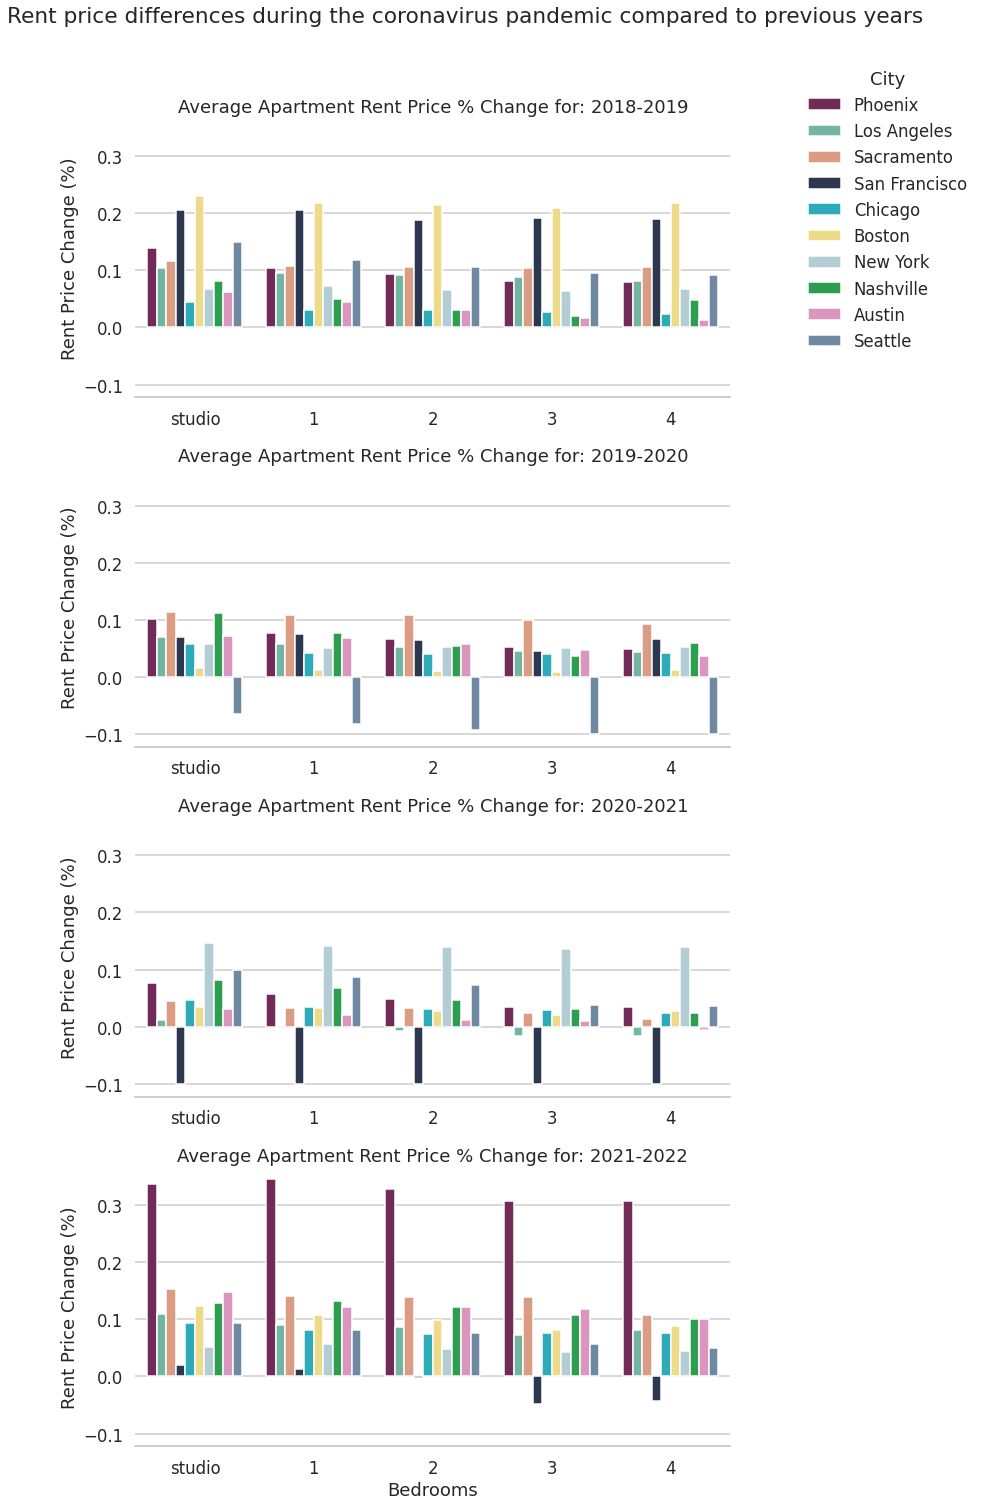

In [ ]:
colors = ["#7e1e59","#66c2a5","#ea9675","#263655","#17becf","#ffe579","#add0d8","#1ab048","#e78ac3","#668aaa"]
sns.set_palette(sns.color_palette(colors))

f = sns.catplot(data = merged_df, x = 'Bedroom', y= 'Percent Difference', kind = 'bar', col = 'Year', hue = 'City',
            col_wrap= 1, sharex = False, height=5, aspect = 2)
f.despine(left=True)
f.fig.suptitle("Rent price differences during the coronavirus pandemic compared to previous years", y=1.05)
f.set_titles("Average Apartment Rent Price % Change for: {col_name}")
f.set_axis_labels('Bedrooms','Rent Price Change (%)')
f.set_xticklabels(rotation = 'horizontal')
sns.move_legend(f, "center right",frameon=False, bbox_to_anchor = (1.1,0.9))

plt.show()

In [ ]:
# Highlight rent with most significant annual drop

def highlight_min(cell):
    if type(cell) != str and cell < 0 :
        return 'color: red'
    else:
        return 'color: black'

In [ ]:
merged_df.style.format({"Price Difference":"${:20,.0f}", 
                        "Percent Difference":"{:.1%}"}).hide_index()\
                        .applymap(highlight_min)


City,State,Price Difference,Percent Difference,Bedroom,Year
Phoenix,AZ,$ 103,13.8%,studio,2018-2019
Los Angeles,CA,$ 121,10.4%,studio,2018-2019
Sacramento,CA,$ 99,11.6%,studio,2018-2019
San Francisco,CA,$ 375,20.6%,studio,2018-2019
Chicago,IL,$ 41,4.5%,studio,2018-2019
Boston,MA,$ 321,23.0%,studio,2018-2019
New York,NY,$ 106,6.8%,studio,2018-2019
Nashville,TN,$ 68,8.2%,studio,2018-2019
Austin,TX,$ 57,6.1%,studio,2018-2019
Seattle,WA,$ 211,14.9%,studio,2018-2019


### **Description of Key Findings for HUD dataset**

##### Before the pandemic, from 2018 to 2019, rental price changes across bedroom types were approximately 5 - 23% for each of the top 10 cities selected for analysis; Boston had the highest price change and Chicago had the lowest price change. As the pandemic began, from 2019 to 2020 the price changes ranged from approximately –10% for Seattle, across all bedroom types,  to ~ 11% for Sacramento. As the pandemic progressed from 2020 to 2021, the price changes declined significantly for Sacramento with a 10% decline. Additionally, Los Angeles experienced the second highest rent price decrease with an ~  – 1% decline across all bedroom types which implies that it may have experienced a population decline resulting in a decrease in demand for rentals. From 2021 to 2022, Phoenix shows a dramatic ~ 30% increase in its rental price change, which suggests that there may have been a large increase in the population of residents seeking rental units which drove up the prices. In addition, San Francisco continued its decline in the 2 - 4 bedroom type category and had a very slight increase in the studio and 1 bedroom types which implies that San Francisco had a decline in its population which lead to a decrease in rental prices. 
